## Importing the libraries

In [1]:
from PIL import Image
from io import BytesIO
import webcolors

import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from importlib import reload
from mpl_toolkits import mplot3d
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from utils import *

## Settinng the logger

In [2]:
import logging
logger = logging.getLogger()
old_level = logger.level
logger.setLevel(100)
sns.set(style="ticks", color_codes=True)
pd.options.display.float_format = '{:.3f}'.format

## Image Exploration

Each pixel in an image can be represented as three 8-bit unsigned (positive) integers ranging from 0 to 255, or scaled into three unsigned (positive) float ranging from 0 to 1. The three values specify the intensity values of each red, green, blue color, which often called as RGB encoding. In this notebook, we use a 220 by 220 pixels of lena.png, which serve as a standard test image widely used in image processing field.

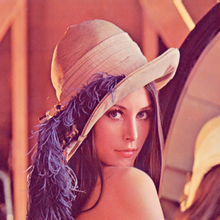

In [3]:
ori_img = Image.open('data/lena.png')
ori_img

In [4]:
X = np.array(ori_img.getdata())
ori_pixels = X.reshape(*ori_img.size, -1)
ori_pixels.shape

(220, 220, 3)

Pixels are stored as a 3D matrix with shape (220, 220, 3). The first two values specify the width and height of the image, the last value specifies the RGB encoding.

In [5]:
ori_img_size = (ori_img)
ori_img_size

85.99609375

In [6]:
ori_img_n_colors = len(set(ori_img.getdata()))
ori_img_n_colors

37270

The original image size of lena.png is 86 KB and has 37270 unique colors present in the image.

$Variance = \sum\limits_{j=0}^k ||x_j-\bar{x}||^2$ where:

$k$ is the number of data points
$x_j$ is the $j$-th data, a 3D vector of RGB value
$\bar{x}$ is the mean of each RGB value

In [9]:
ori_img_total_variance = sum(np.linalg.norm(X - np.mean(X, axis = 0), axis = 1)**2)
print("Variance==> ",ori_img_total_variance)

Variance==>  302426700.6427498


## Principal Component Analysis